In [6]:
import pickle
with open(r'C:\Users\arune\OneDrive\Desktop\AmazonMusicClustering\data\AmazonMusic_data.pkl', 'rb') as file:
    dataset = pickle.load(file)

dataset.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.153476,-1.511128,-0.757909,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005,-0.401735
1,-1.028518,-1.528056,-1.098629,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487,0.124906
2,-0.488051,-1.418027,-1.127899,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003,-0.003949
3,0.573581,-0.313510,-0.470677,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268,-0.397437
4,0.406294,-1.028695,-0.768227,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593,-0.346143


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Use sample for Hierarchial Clustering to fix Memory Error
import numpy as np
sample_index = np.random.choice(dataset.shape[0], 5000, replace=False)
sample_data = dataset.iloc[sample_index]
sample_data.shape

(5000, 10)

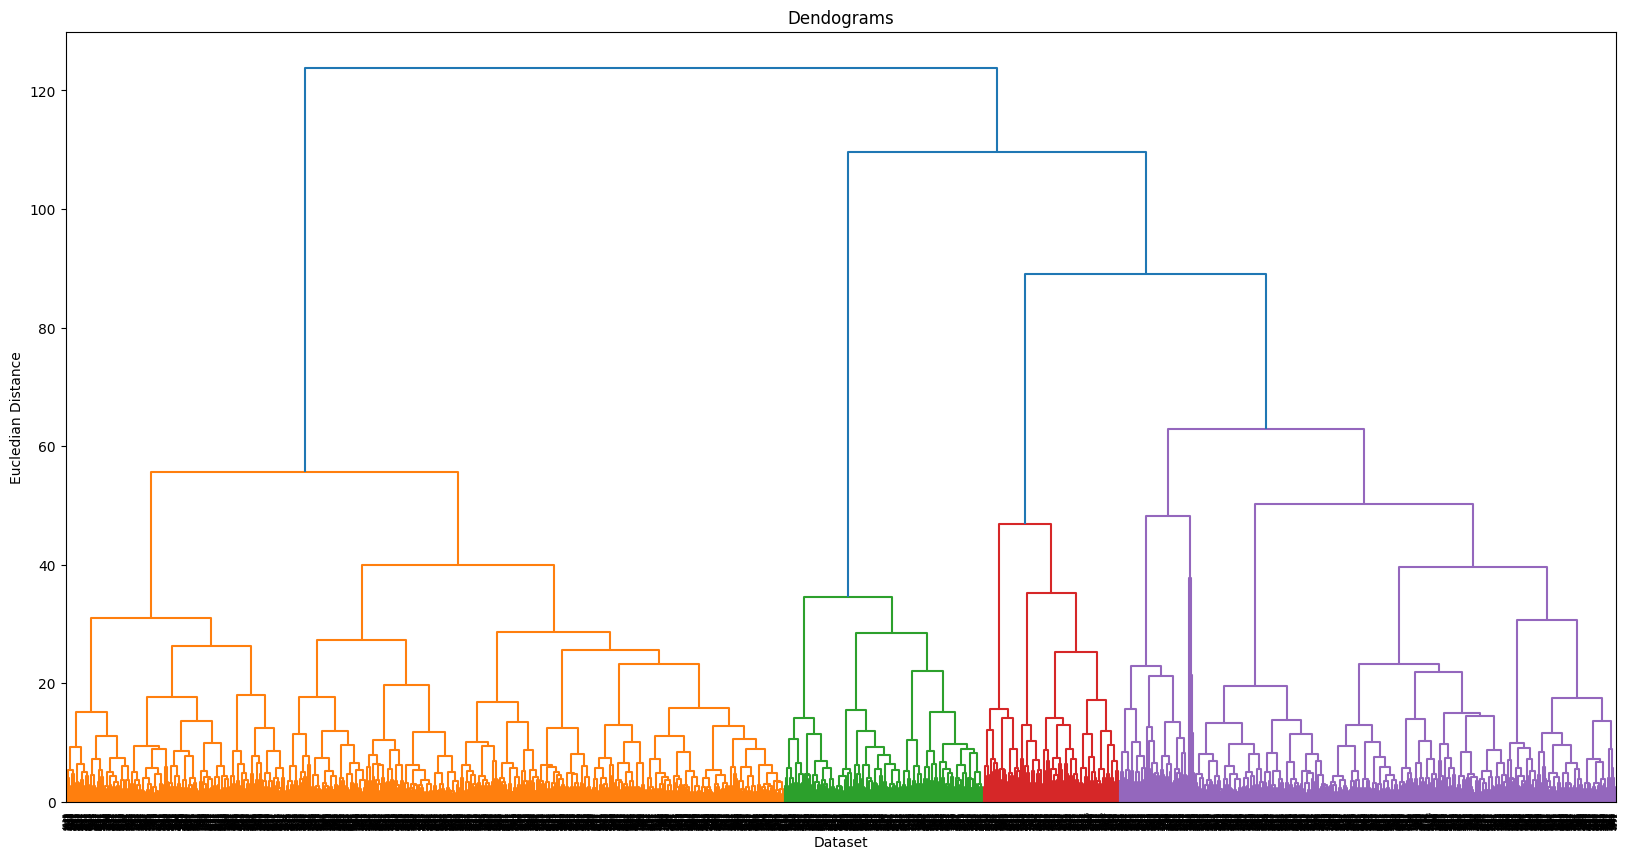

In [12]:
import scipy.cluster .hierarchy as sch
plt.figure(figsize=(20,10))
plt.title('Dendograms')
sch.dendrogram(sch.linkage(sample_data,method='ward'))
plt.xlabel('Dataset')
plt.ylabel('Eucledian Distance')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
labels = cluster.fit_predict(sample_data)
labels

array([1, 0, 0, ..., 1, 0, 1], shape=(5000,))

C:\Users\arune\AppData\Local\Temp\ipykernel_4060\138890560.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


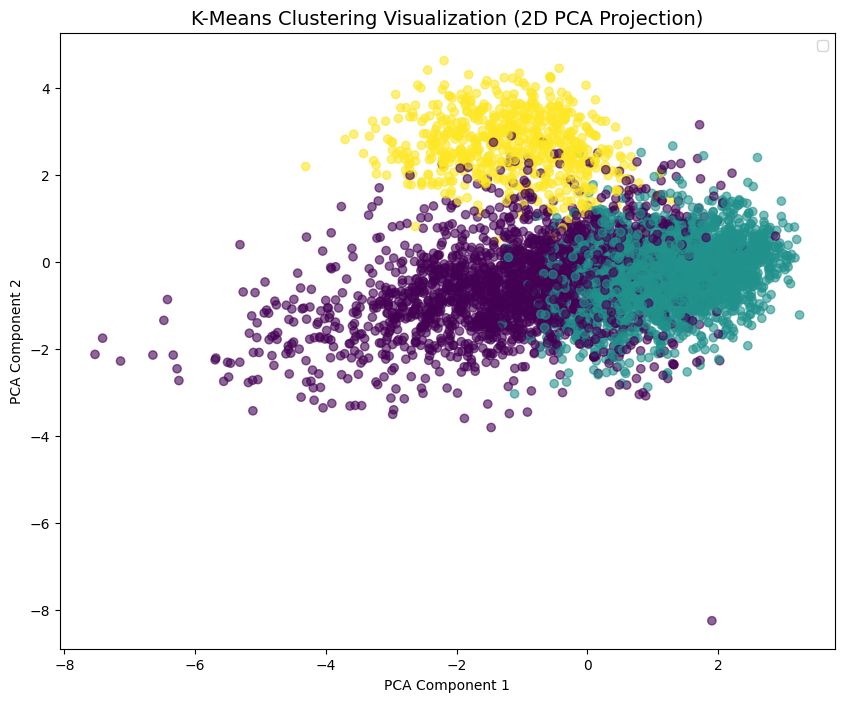

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(sample_data)

plt.figure(figsize=(10,8))
plt.scatter(df_pca[:,0], df_pca[:,1], c=labels,cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Visualization (2D PCA Projection)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [23]:
with open(r"C:\Users\arune\OneDrive\Desktop\AmazonMusicClustering\data\HierarchialCluster.pkl",'wb') as file:
    pickle.dump(cluster, file)